# Tent Map Dynamical System Analysis

The tent map is a simple yet fascinating dynamical system that exhibits chaotic behavior. It's defined as:

$$f(x) = \begin{cases} 
\mu x & \text{if } 0 \leq x \leq \frac{1}{2} \\
\mu(1-x) & \text{if } \frac{1}{2} < x \leq 1
\end{cases}$$

where $\mu$ is the parameter and $x \in [0,1]$.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from interactive_bifurcation import bifurcation_with_fixed_points, analyze_specific_mu_values, theoretical_vs_numerical_comparison

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Tent Map Implementation

In [75]:
def tent_map(x, mu):
    """
    Tent map function: f(x) = mu*x if x <= 0.5, else mu*(1-x)
    
    Parameters:
    x : float or array-like, values in [0,1]
    mu : float, parameter (typically in [0,2])
    
    Returns:
    float or array-like, mapped values
    """
    return np.where(x <= 0.5, mu * x, mu * (1 - x))
  
def iterate_tent_map(x0, mu, n_iterations):
    """
    Iterate the tent map starting from x0
    
    Parameters:
    x0 : float, initial condition
    mu : float, parameter
    n_iterations : int, number of iterations
    
    Returns:
    array, sequence of iterations
    """
    trajectory = np.zeros(n_iterations + 1)
    trajectory[0] = x0
    
    for i in range(n_iterations):
        trajectory[i + 1] = tent_map(trajectory[i], mu)
    
    return trajectory

## 2. Visualization of the Tent Map Function

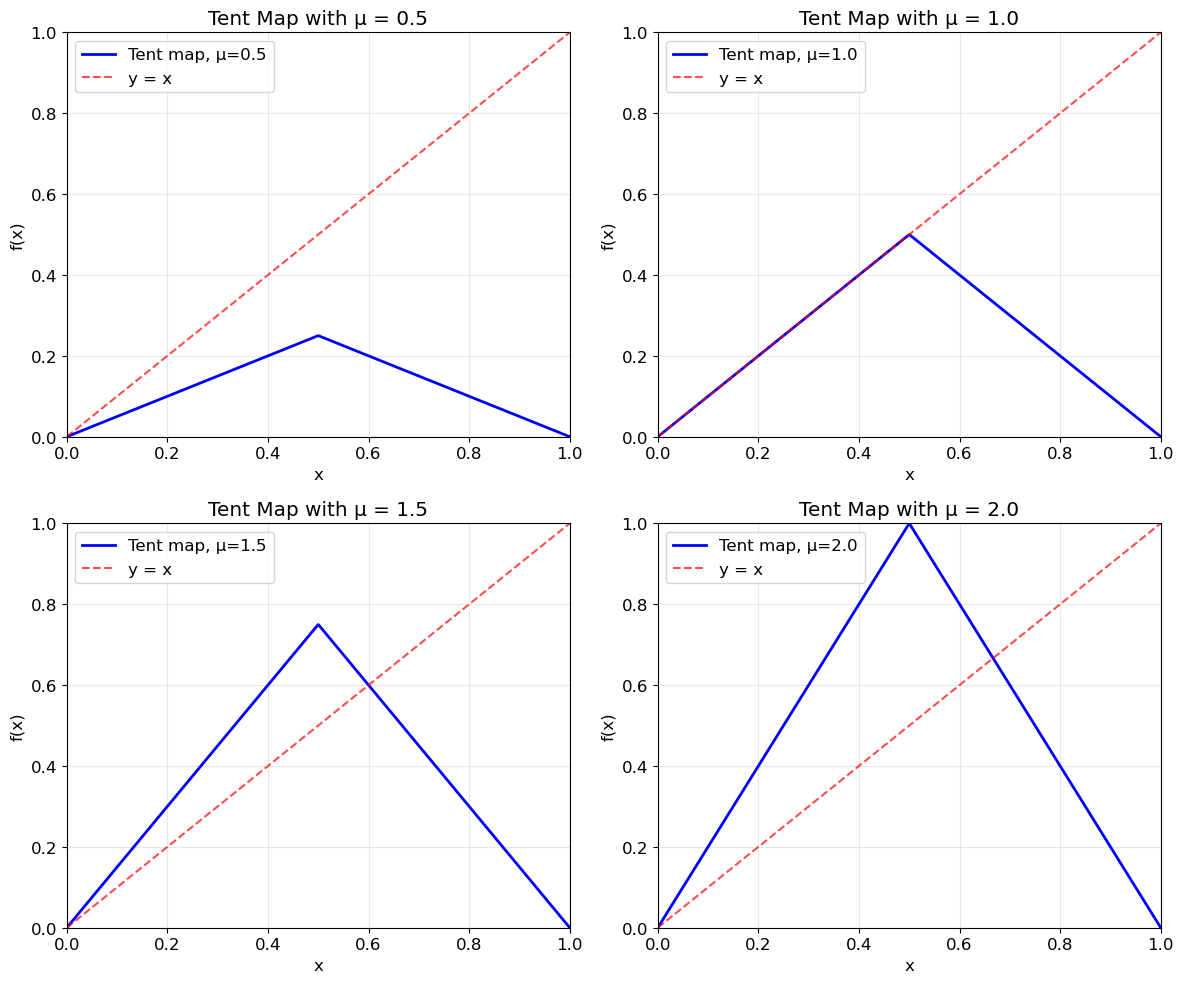

In [78]:
# Plot the tent map for different parameter values
x = np.linspace(0, 1, 1000)
mu_values = [0.5, 1.0, 1.5, 2.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, mu in enumerate(mu_values):
    y = tent_map(x, mu)
    
    axes[i].plot(x, y, 'b-', linewidth=2, label=f'Tent map, μ={mu}')
    axes[i].plot(x, x, 'r--', alpha=0.7, label='y = x')
    axes[i].set_xlim(0, 1)
    axes[i].set_ylim(0, max(1, mu/2))
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('f(x)')
    axes[i].set_title(f'Tent Map with μ = {mu}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Time Series Analysis

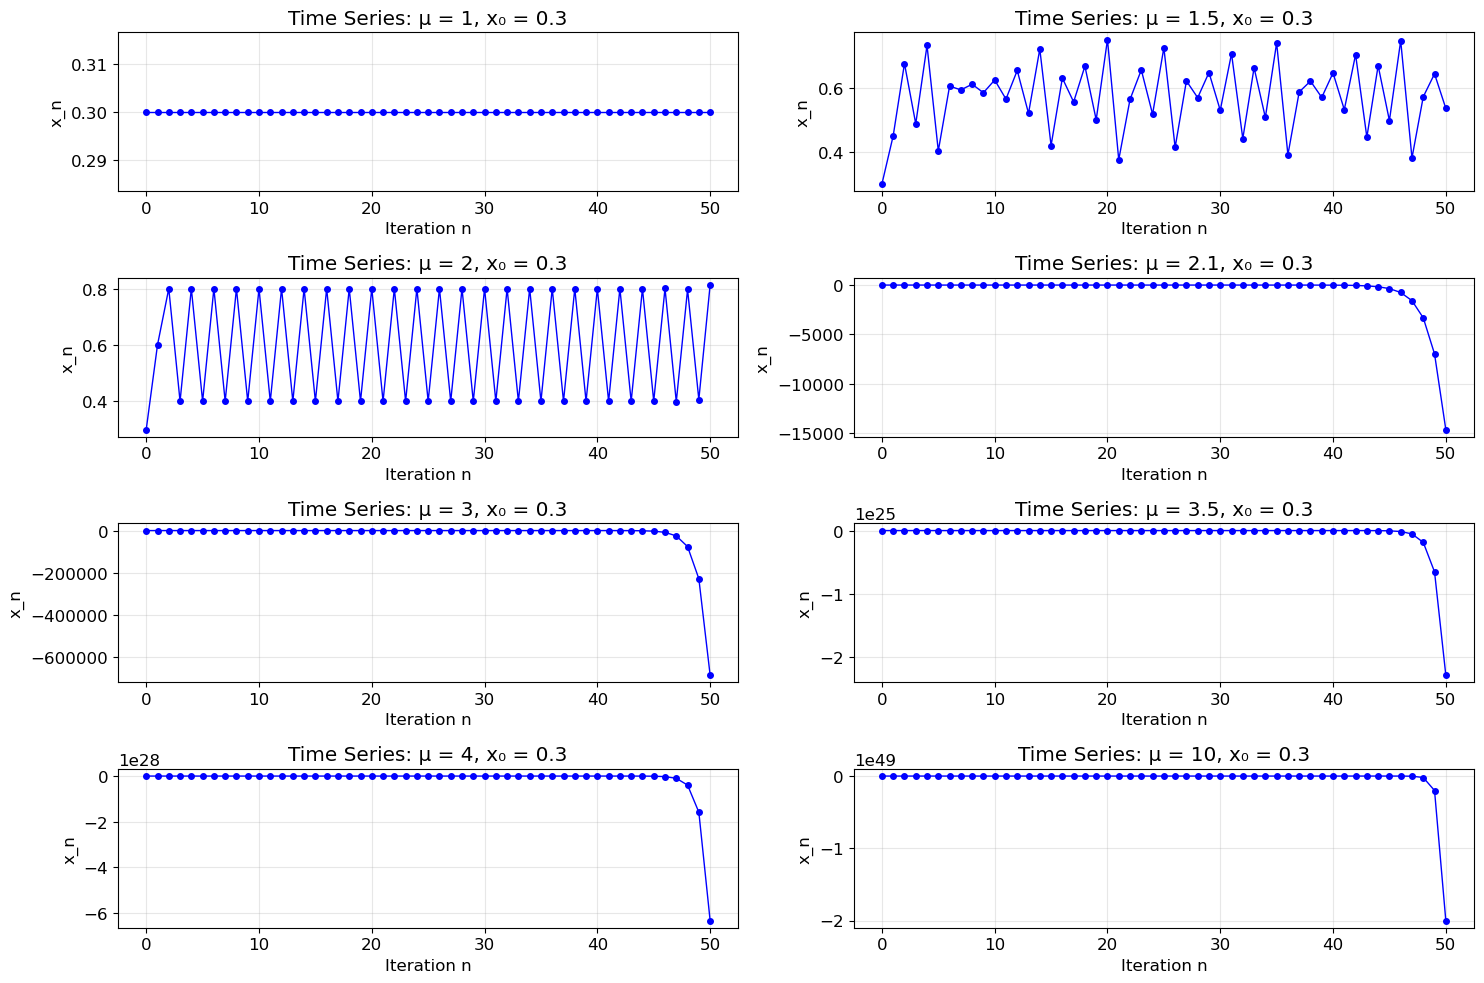

In [260]:
# Generate time series for different parameter values
x0 = 0.3  # Initial condition
n_iter = 50
mu_values = [1, 1.5, 2, 2.1, 3, 3.5, 4, 10]

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()

for i, mu in enumerate(mu_values):
    trajectory = iterate_tent_map(x0, mu, n_iter)
    
    axes[i].plot(range(len(trajectory)), trajectory, 'bo-', markersize=4, linewidth=1)
    axes[i].set_xlabel('Iteration n')
    axes[i].set_ylabel('x_n')
    axes[i].set_title(f'Time Series: μ = {mu}, x₀ = {x0}')
    axes[i].grid(True, alpha=0.3)
    #axes[i].set_ylim(-1, 1)

plt.tight_layout()
plt.show()

## 4. Cobweb Plot (Graphical Iteration)

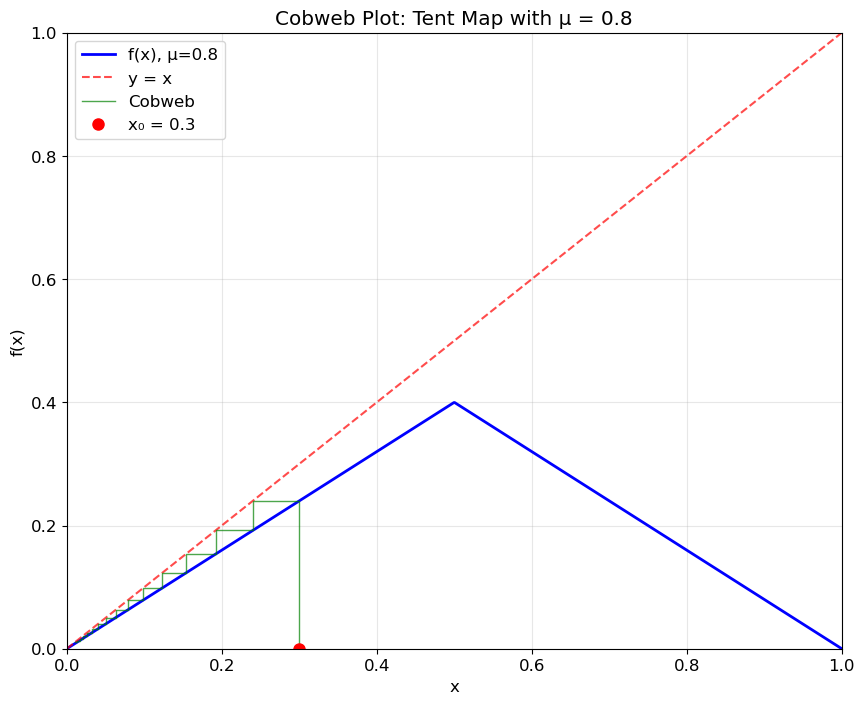

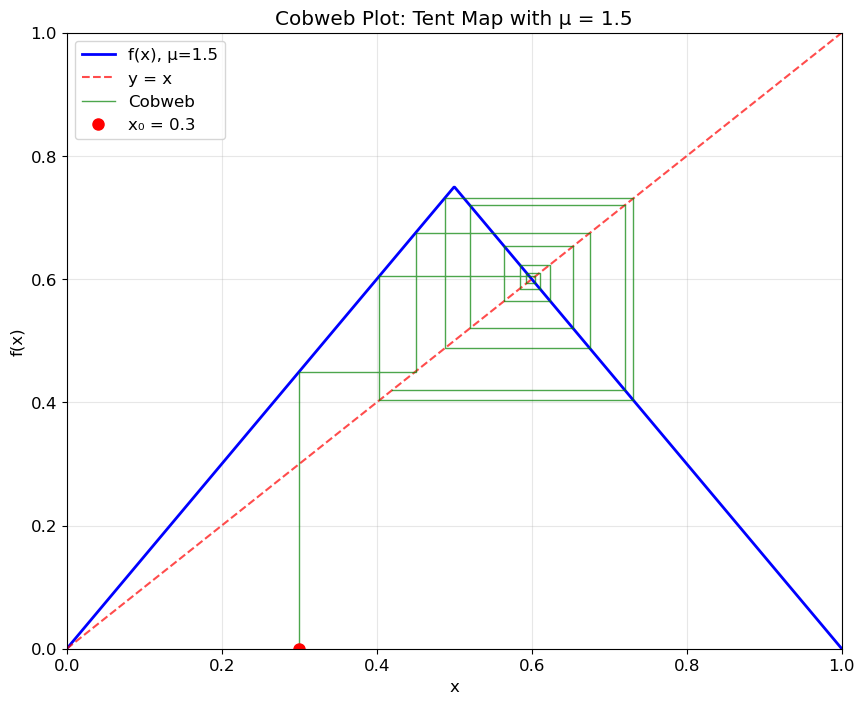

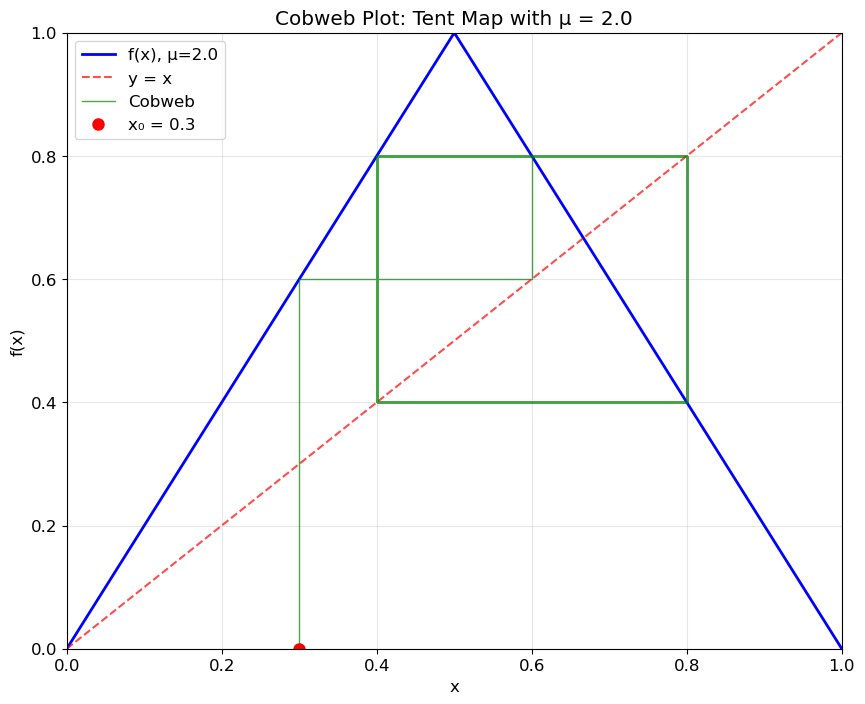

In [86]:
def cobweb_plot(mu, x0, n_iterations=20):
    """
    Create a cobweb plot for the tent map
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Plot the function
    x = np.linspace(0, 1, 1000)
    y = tent_map(x, mu)
    ax.plot(x, y, 'b-', linewidth=2, label=f'f(x), μ={mu}')
    ax.plot(x, x, 'r--', alpha=0.7, label='y = x')
    
    # Generate cobweb
    x_current = x0
    cobweb_x = [x_current]
    cobweb_y = [0]
    
    for i in range(n_iterations):
        # Vertical line to function
        y_next = tent_map(x_current, mu)
        cobweb_x.extend([x_current, x_current])
        cobweb_y.extend([cobweb_y[-1], y_next])
        
        # Horizontal line to y=x
        cobweb_x.extend([x_current, y_next])
        cobweb_y.extend([y_next, y_next])
        
        x_current = y_next
    
    ax.plot(cobweb_x, cobweb_y, 'g-', alpha=0.7, linewidth=1, label='Cobweb')
    ax.plot(x0, 0, 'ro', markersize=8, label=f'x₀ = {x0}')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, max(1, mu/2))
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Cobweb Plot: Tent Map with μ = {mu}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.show()

# Create cobweb plots for different parameters
for mu in [0.8, 1.5, 2.0]:
    cobweb_plot(mu, 0.3, 15)

## 5. Fixed Point Analysis

Fixed points satisfy $f(x^*) = x^*$. For the tent map:
- When $x^* \leq 0.5$: $\mu x^* = x^* \Rightarrow x^* = 0$ (if $\mu \neq 1$)
- When $x^* > 0.5$: $\mu(1-x^*) = x^* \Rightarrow x^* = \frac{\mu}{\mu + 1}$

In [89]:
def find_fixed_points(mu):
    """
    Find fixed points of the tent map for given parameter mu
    """
    fixed_points = []
    
    # x* = 0 is always a fixed point
    fixed_points.append(0)
    
    # Non-trivial fixed point: x* = mu/(mu+1)
    if mu > 0:
        x_star = mu / (mu + 1)
        if 0 < x_star <= 1:
            fixed_points.append(x_star)
    
    return fixed_points

def analyze_stability(mu, x_star):
    """
    Analyze stability of fixed point using derivative
    For tent map: f'(x) = mu if x < 0.5, -mu if x > 0.5
    """
    if x_star == 0:
        derivative = mu  # At x=0, we're on the left branch
    elif x_star < 0.5:
        derivative = mu
    else:
        derivative = -mu
    
    if abs(derivative) < 1:
        return "Stable"
    elif abs(derivative) > 1:
        return "Unstable"
    else:
        return "Marginally stable"

# Analyze fixed points for different parameter values
mu_range = np.linspace(0.1, 2.5, 25)
analysis_data = []

for mu in mu_range:
    fixed_points = find_fixed_points(mu)
    for fp in fixed_points:
        stability = analyze_stability(mu, fp)
        analysis_data.append({
            'mu': mu,
            'fixed_point': fp,
            'stability': stability
        })

# Display analysis
df = pd.DataFrame(analysis_data)
print("Fixed Point Analysis:")
print(df.head(100))

Fixed Point Analysis:
     mu  fixed_point stability
0   0.1     0.000000    Stable
1   0.1     0.090909    Stable
2   0.2     0.000000    Stable
3   0.2     0.166667    Stable
4   0.3     0.000000    Stable
5   0.3     0.230769    Stable
6   0.4     0.000000    Stable
7   0.4     0.285714    Stable
8   0.5     0.000000    Stable
9   0.5     0.333333    Stable
10  0.6     0.000000    Stable
11  0.6     0.375000    Stable
12  0.7     0.000000    Stable
13  0.7     0.411765    Stable
14  0.8     0.000000    Stable
15  0.8     0.444444    Stable
16  0.9     0.000000    Stable
17  0.9     0.473684    Stable
18  1.0     0.000000    Stable
19  1.0     0.500000    Stable
20  1.1     0.000000  Unstable
21  1.1     0.523810  Unstable
22  1.2     0.000000  Unstable
23  1.2     0.545455  Unstable
24  1.3     0.000000  Unstable
25  1.3     0.565217  Unstable
26  1.4     0.000000  Unstable
27  1.4     0.583333  Unstable
28  1.5     0.000000  Unstable
29  1.5     0.600000  Unstable
30  1.6     0.000

## 6. Bifurcation Analysis

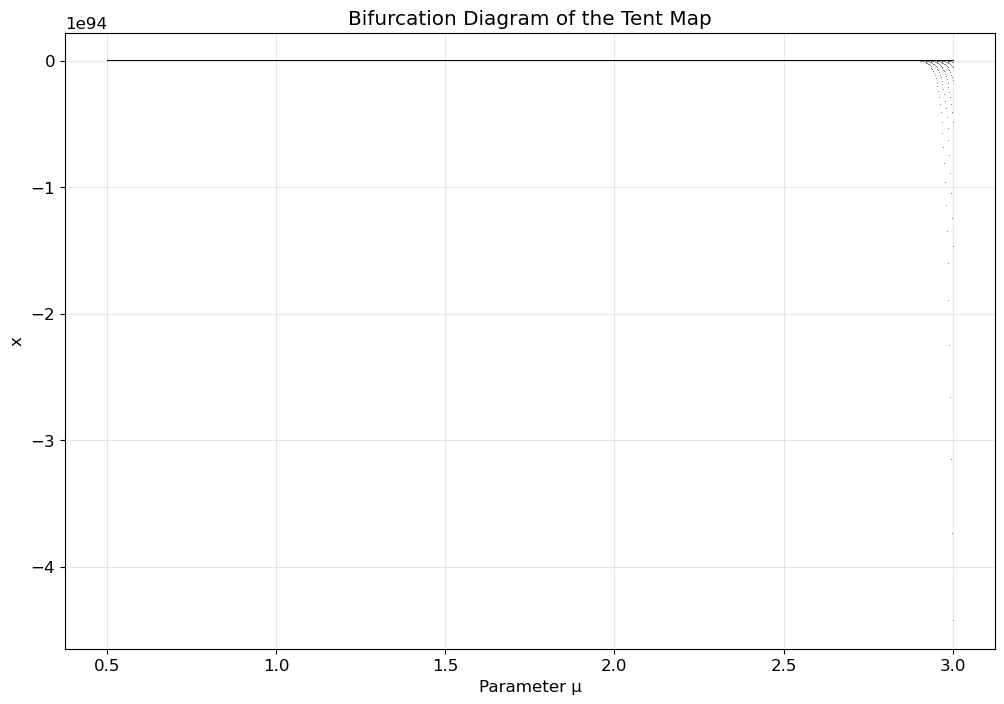

In [258]:
#def bifurcation_diagram(mu_min=0.5, mu_max=2, n_mu=1000, n_transient=100, n_plot=100):
#def bifurcation_diagram(mu_min=2, mu_max=2.0001, n_mu=1000, n_transient=100, n_plot=100):
def bifurcation_diagram(mu_min=0.5, mu_max=3, n_mu=1000, n_transient=100, n_plot=100):

    
    """
    Generate bifurcation diagram for the tent map
    """
    mu_values = np.linspace(mu_min, mu_max, n_mu)
    x0 = 0.5  # Initial condition
    
    mu_plot = []
    x_plot = []
    
    for mu in mu_values:
        # Skip transient behavior
        trajectory = iterate_tent_map(x0, mu, n_transient + n_plot)
        
        # Plot the last n_plot points
        for x in trajectory[-n_plot:]:
            mu_plot.append(mu)
            x_plot.append(x)
    
    return np.array(mu_plot), np.array(x_plot)

# Generate bifurcation diagram
mu_bif, x_bif = bifurcation_diagram()

plt.figure(figsize=(12, 8))
plt.plot(mu_bif, x_bif, ',k', alpha=0.5, markersize=0.1)
plt.xlabel('Parameter μ')
plt.ylabel('x')
plt.title('Bifurcation Diagram of the Tent Map')
plt.grid(True, alpha=0.3)
plt.show()

## 6.1 Interactive Bifurcation Diagram Explorer

This section provides functions to zoom into specific regions of the bifurcation diagram and vary the resolution for detailed analysis.

In [183]:
def explore_bifurcation_diagram(mu_min=0.1, mu_max=2.5, mu_points=2000, 
                               n_transient=500, n_plot=100, x0=0.7, auto_scale_y=True):
    """
    Create an interactive bifurcation diagram with zoom capability
    
    Parameters:
    -----------
    mu_min : float
        Minimum mu value to plot
    mu_max : float  
        Maximum mu value to plot
    mu_points : int
        Number of mu values to calculate (resolution)
    n_transient : int
        Number of initial iterations to skip (let system settle)
    n_plot : int
        Number of final iterations to plot
    x0 : float
        Initial condition
    auto_scale_y : bool
        If True, automatically scale y-axis to data range
    """
    
    # Create parameter array
    mu_values = np.linspace(mu_min, mu_max, mu_points)
    
    # Store results
    mu_plot = []
    x_plot = []
    
    print(f"Computing bifurcation diagram from μ={mu_min:.3f} to μ={mu_max:.3f}")
    print(f"Resolution: {mu_points} points")
    
    # Calculate bifurcation data
    for i, mu in enumerate(mu_values):
        if i % (mu_points // 10) == 0:
            print(f"Progress: {100*i/mu_points:.0f}%")
        
        # Generate trajectory
        trajectory = iterate_tent_map(x0, mu, n_transient + n_plot)
        
        # Take only the final points (after transients)
        final_points = trajectory[-n_plot:]
        
        # Add to plot data
        mu_plot.extend([mu] * len(final_points))
        x_plot.extend(final_points)
    
    # Calculate y-axis limits
    if auto_scale_y and len(x_plot) > 0:
        x_min, x_max = np.min(x_plot), np.max(x_plot)
        y_range = x_max - x_min
        y_padding = max(0.05, y_range * 0.1)  # 10% padding or minimum 0.05
        y_limits = [max(0, x_min - y_padding), min(1, x_max + y_padding)]
        print(f"Auto-scaled y-axis: [{y_limits[0]:.3f}, {y_limits[1]:.3f}]")
    else:
        y_limits = [0, 1]
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Left plot: Full bifurcation diagram
    ax1.plot(mu_plot, x_plot, ',k', markersize=0.1, alpha=0.5)
    ax1.set_xlabel('Parameter μ')
    ax1.set_ylabel('x')
    ax1.set_title('Full Bifurcation Diagram')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 2.5)
    ax1.set_ylim(-3, 1)  # Keep full scale for overview
    
    # Highlight the zoomed region
    ax1.axvspan(mu_min, mu_max, alpha=0.2, color='red', label=f'Zoom: [{mu_min:.2f}, {mu_max:.2f}]')
    ax1.legend()
    
    # Right plot: Zoomed bifurcation diagram with auto-scaled y-axis
    ax2.plot(mu_plot, x_plot, ',k', markersize=0.5, alpha=0.7)
    ax2.set_xlabel('Parameter μ')
    ax2.set_ylabel('x')
    ax2.set_title(f'Zoomed View: μ ∈ [{mu_min:.3f}, {mu_max:.3f}]')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(mu_min, mu_max)
    ax2.set_ylim()  # Use auto-scaled limits
    
    plt.tight_layout()
    plt.show()
    
    # Print some analysis
    print(f"\nAnalysis for μ ∈ [{mu_min:.3f}, {mu_max:.3f}]:")
    print(f"- Total data points: {len(mu_plot):,}")
    print(f"- Parameter resolution: Δμ = {(mu_max-mu_min)/mu_points:.6f}")
    print(f"- Transient iterations: {n_transient}")
    print(f"- Plotted iterations per μ: {n_plot}")
    if auto_scale_y:
        print(f"- Data range: x ∈ [{x_min:.4f}, {x_max:.4f}]")
        print(f"- Y-axis scaled to: [{y_limits[0]:.3f}, {y_limits[1]:.3f}]")

Select Parameters to zoom in

Computing bifurcation diagram from μ=2.960 to μ=3.100
Resolution: 1500 points
Progress: 0%
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%


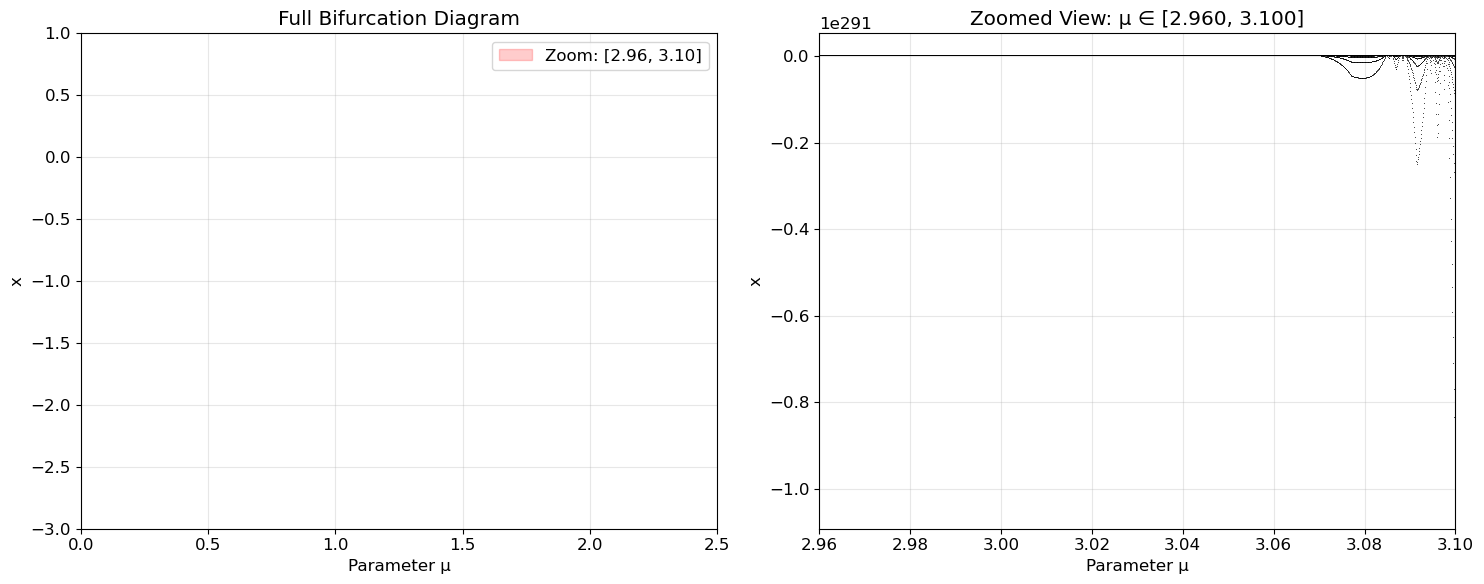


Analysis for μ ∈ [2.960, 3.100]:
- Total data points: 150,000
- Parameter resolution: Δμ = 0.000093
- Transient iterations: 500
- Plotted iterations per μ: 100


In [194]:
# Example usage - zoom into chaotic region
explore_bifurcation_diagram(mu_min=2.96, mu_max=3.1, mu_points=1500, x0=0.7, auto_scale_y=False)

Computing bifurcation diagram from μ=0.980 to μ=1.000
Resolution: 1000 points
Progress: 0%
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%
Auto-scaled y-axis: [0.000, 0.550]


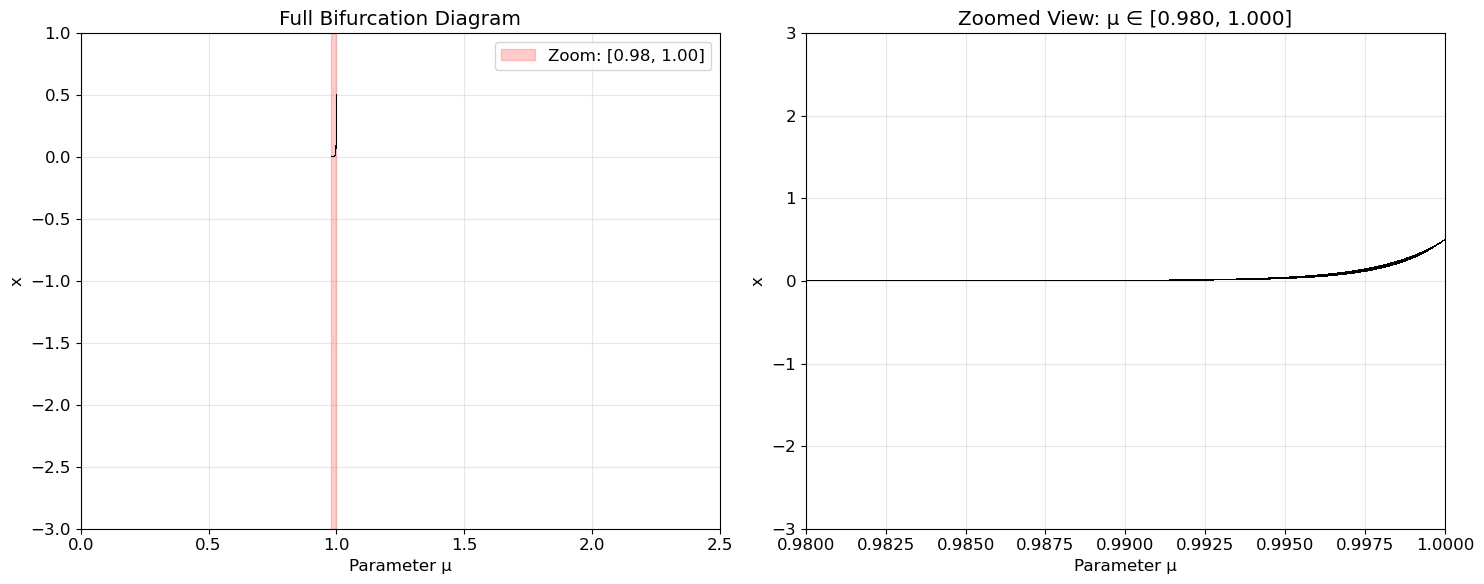


Analysis for μ ∈ [0.980, 1.000]:
- Total data points: 100,000
- Parameter resolution: Δμ = 0.000020
- Transient iterations: 500
- Plotted iterations per μ: 100
- Data range: x ∈ [0.0000, 0.5000]
- Y-axis scaled to: [0.000, 0.550]


In [177]:
# Example - onset of chaos
explore_bifurcation_diagram(mu_min=0.98, mu_max=1, mu_points=1000, x0=0.5, auto_scale_y=True)


## 6.2 Fixed Points Analysis on Bifurcation Diagram

For the tent map, we can analytically calculate the fixed points and overlay them on the bifurcation diagram to understand the transition from stable dynamics to chaos.

**Tent Map Fixed Points:**
- $x_1^* = 0$ (always exists)
- $x_2^* = \frac{\mu}{1+\mu}$ (non-trivial fixed point)

**Stability Analysis:**
- For $\mu < 1$: Both fixed points are **stable**
- For $\mu \geq 1$: Both fixed points become **unstable** → Chaos emerges

Computing bifurcation diagram with fixed points from μ=0.100 to μ=2.500
Resolution: 1500 points
Progress: 0%
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%


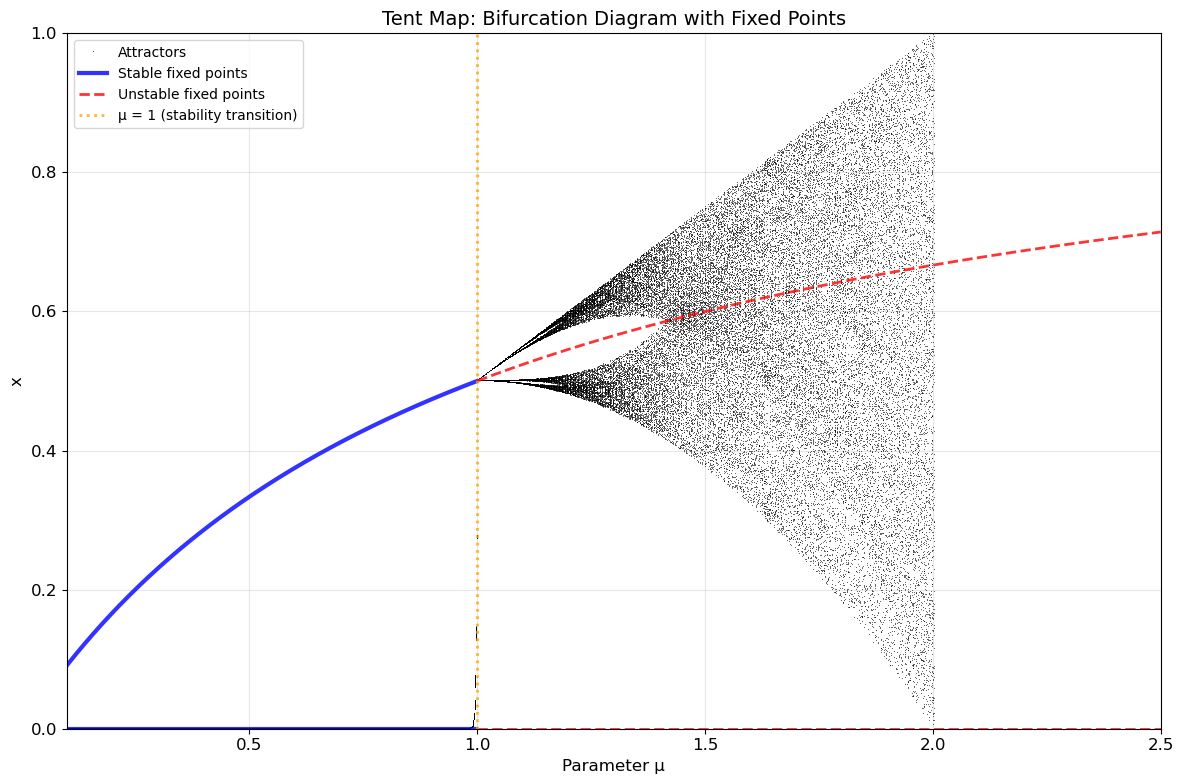


=== Fixed Point Analysis ===
Fixed Points for the Tent Map:
1. x₁* = 0 (always exists)
2. x₂* = μ/(1+μ)

Stability:
- For μ < 1: Both fixed points are stable
- For μ = 1: Transition to instability
- For μ > 1: Both fixed points become unstable → Chaos

At μ = 1:
- x₁* = 0
- x₂* = 1/2 = 0.5


In [103]:
# Main function: Bifurcation diagram with fixed points
bifurcation_with_fixed_points(mu_min=0.1, mu_max=2.5, mu_points=1500, 
                             n_transient=400, n_plot=80, x0=0.7)

Computing bifurcation diagram with fixed points from μ=0.700 to μ=1.300
Resolution: 1000 points
Progress: 0%
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%


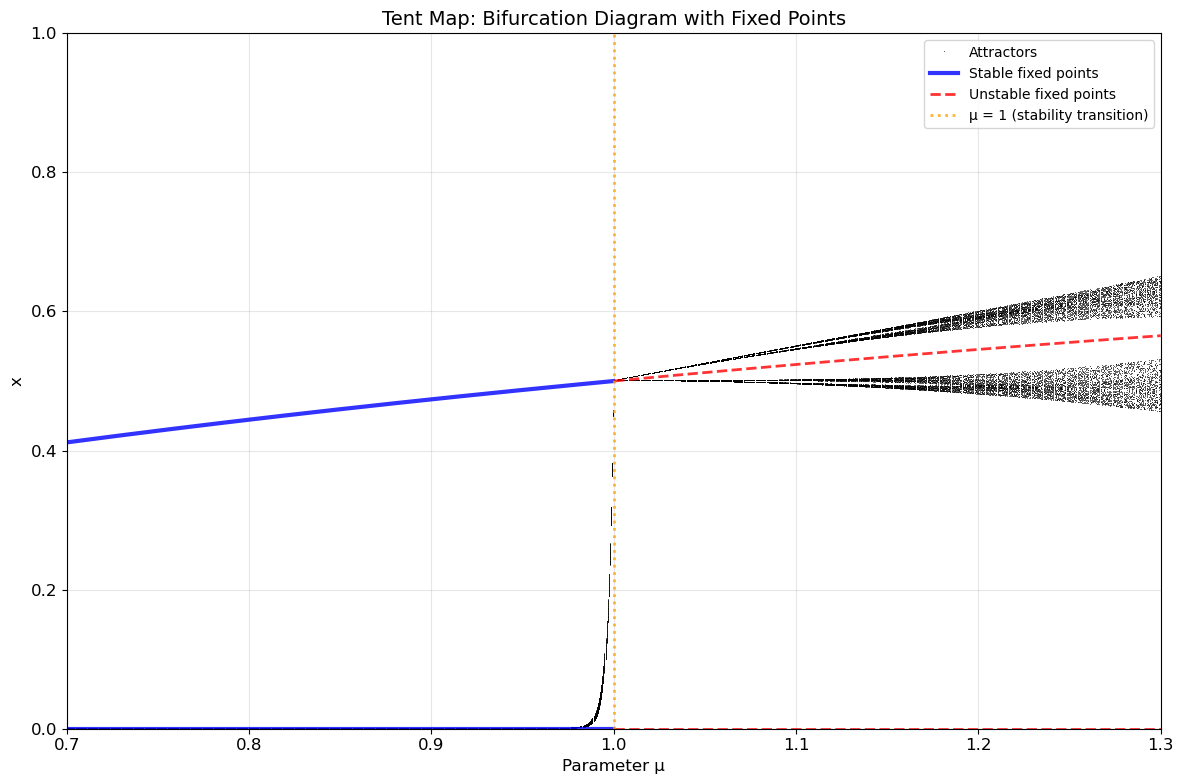


=== Fixed Point Analysis ===
Fixed Points for the Tent Map:
1. x₁* = 0 (always exists)
2. x₂* = μ/(1+μ)

Stability:
- For μ < 1: Both fixed points are stable
- For μ = 1: Transition to instability
- For μ > 1: Both fixed points become unstable → Chaos

At μ = 1:
- x₁* = 0
- x₂* = 1/2 = 0.5


In [104]:
# Zoom into the critical transition region around μ = 1
bifurcation_with_fixed_points(mu_min=0.7, mu_max=1.3, mu_points=1000, 
                             n_transient=300, n_plot=60, x0=0.5)

### Analysis of Specific μ Values
Let's examine how the system behaves at specific parameter values to see the fixed points in action:

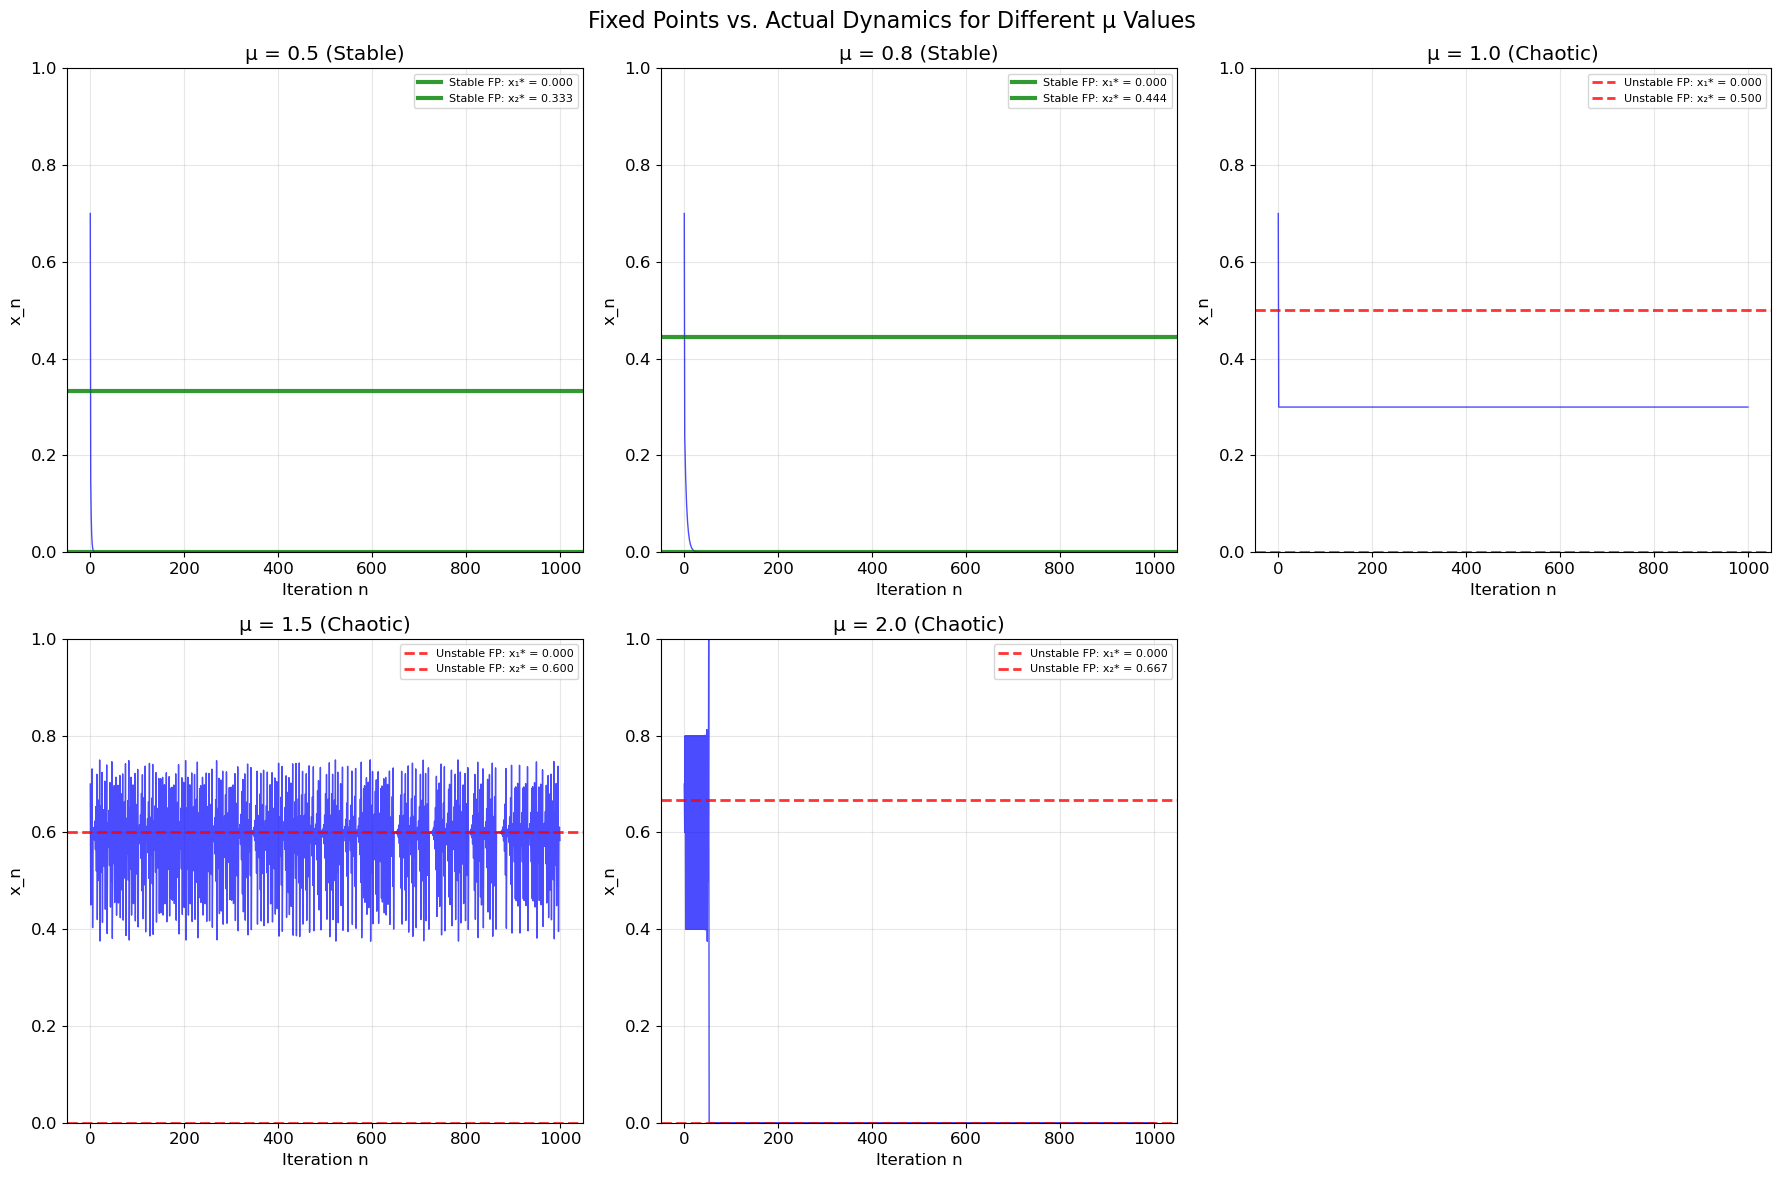

In [108]:
# Analyze specific μ values showing fixed points vs dynamics
analyze_specific_mu_values(mu_values=[0.5, 0.8, 1.0, 1.5, 2.0], x0=0.7, n_iterations=1000)

### Theoretical vs Numerical Comparison
Compare our analytical fixed point calculations with the numerical bifurcation diagram:

/Users/cosimoradler/Documents/_AUC/Academics/Semester 4/Complexity Lab/Exercise Module 1/Lab/tent_map/interactive_bifurcation.py:9: RuntimeWarning: overflow encountered in multiply
  return np.where(x <= 0.5, mu * x, mu * (1 - x))
/Users/cosimoradler/Documents/_AUC/Academics/Semester 4/Complexity Lab/Exercise Module 1/Lab/tent_map/interactive_bifurcation.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return np.where(x <= 0.5, mu * x, mu * (1 - x))


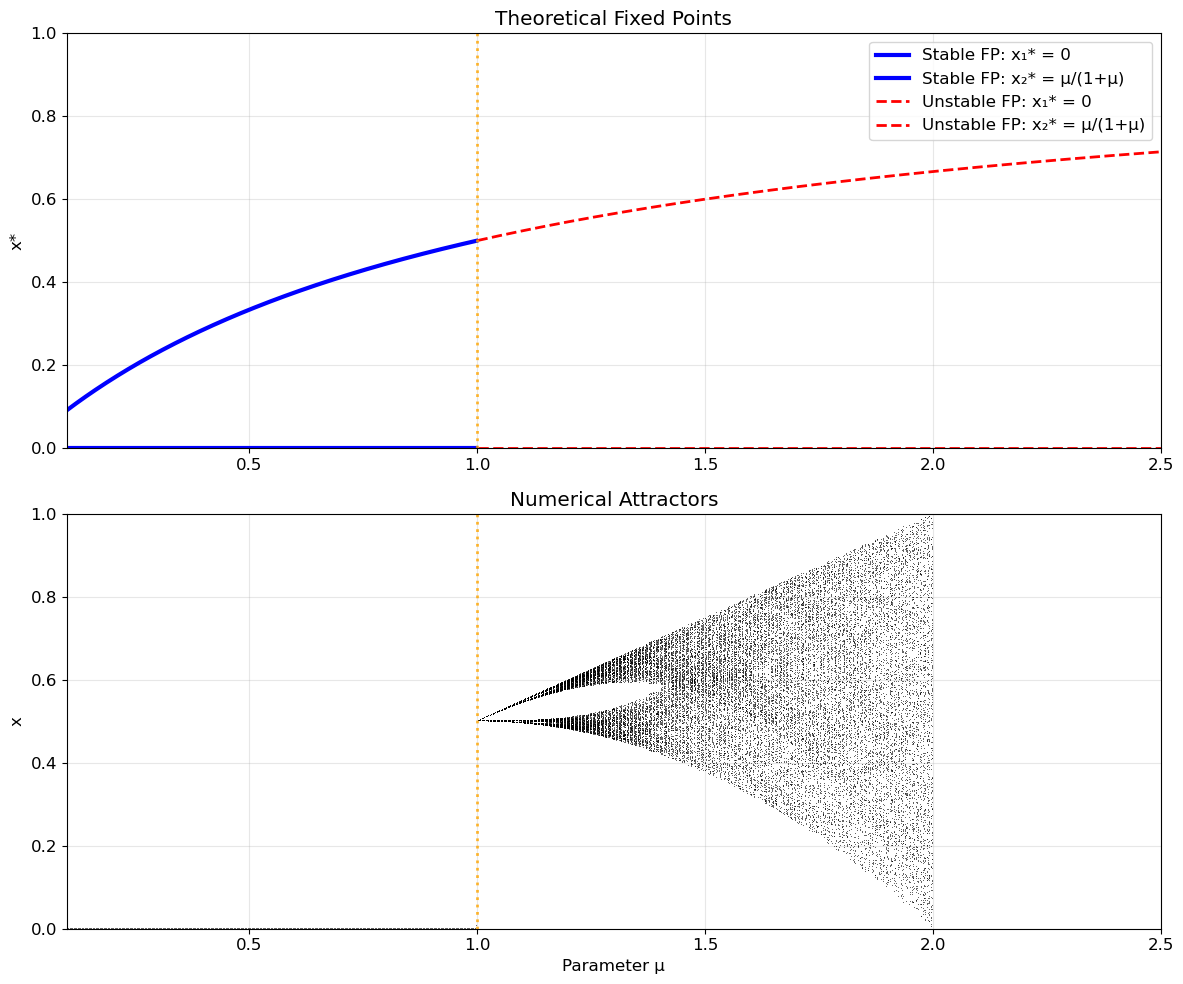

=== Theoretical vs Numerical Comparison ===
Above μ = 1: Fixed points become unstable and chaos emerges
Below μ = 1: System converges to one of the stable fixed points
The transition at μ = 1 marks the onset of chaos


In [111]:
# Compare theoretical predictions with numerical results
theoretical_vs_numerical_comparison(mu_min=0.1, mu_max=2.5, mu_points=800)

## 7. Lyapunov Exponent Calculation

The Lyapunov exponent measures the rate of divergence of nearby trajectories:
$$\lambda = \lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} \ln|f'(x_i)|$$

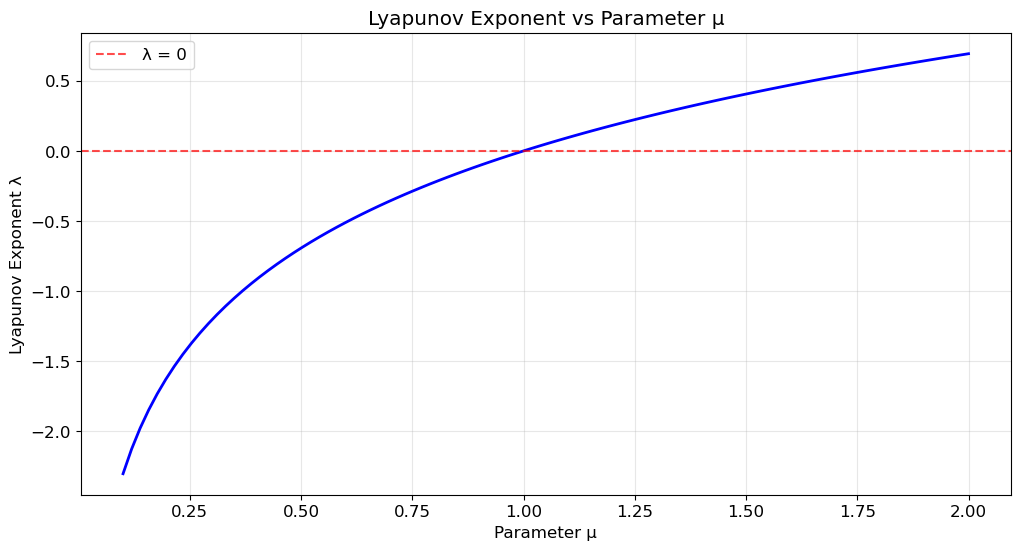

Chaotic behavior (λ > 0) occurs approximately for μ > 1.002


In [252]:
def tent_map_derivative(x, mu):
    """
    Derivative of the tent map
    """
    return np.where(x < 0.5, mu, -mu)

def lyapunov_exponent(mu, x0=0.3, n_iterations=10000):
    """
    Calculate Lyapunov exponent for the tent map
    """
    trajectory = iterate_tent_map(x0, mu, n_iterations)
    
    # Calculate sum of log derivatives
    log_derivatives = np.log(np.abs(tent_map_derivative(trajectory[:-1], mu)))
    
    # Filter out any infinite values (shouldn't happen for tent map)
    log_derivatives = log_derivatives[np.isfinite(log_derivatives)]
    
    return np.mean(log_derivatives)

# Calculate Lyapunov exponents for different parameter values
mu_values = np.linspace(0.1, 2.0, 100)
lyapunov_values = [lyapunov_exponent(mu) for mu in mu_values]

plt.figure(figsize=(12, 6))
plt.plot(mu_values, lyapunov_values, 'b-', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='λ = 0')
plt.xlabel('Parameter μ')
plt.ylabel('Lyapunov Exponent λ')
plt.title('Lyapunov Exponent vs Parameter μ')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Find chaotic regime (λ > 0)
chaotic_mu = mu_values[np.array(lyapunov_values) > 0]
if len(chaotic_mu) > 0:
    print(f"Chaotic behavior (λ > 0) occurs approximately for μ > {chaotic_mu[0]:.3f}")
else:
    print("No chaotic behavior detected in this parameter range")

## 8. Sensitivity to Initial Conditions

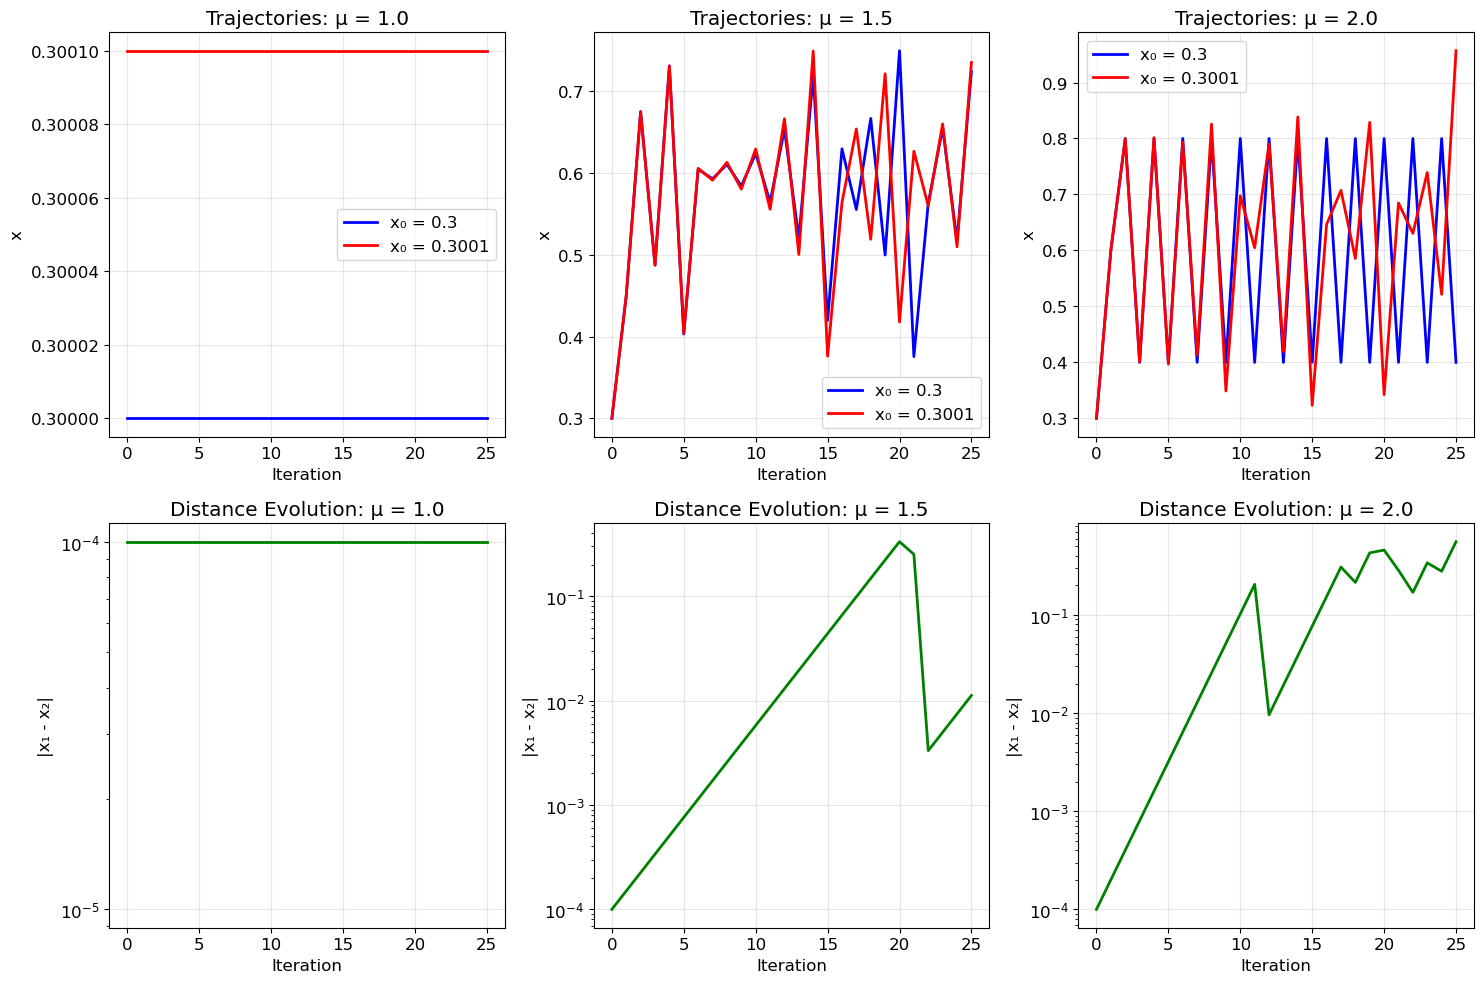

In [116]:
def sensitivity_analysis(mu, x0_1, x0_2, n_iterations=30):
    """
    Analyze sensitivity to initial conditions
    """
    traj1 = iterate_tent_map(x0_1, mu, n_iterations)
    traj2 = iterate_tent_map(x0_2, mu, n_iterations)
    
    distance = np.abs(traj1 - traj2)
    
    return traj1, traj2, distance

# Test sensitivity for different parameter values
mu_test = [1.0, 1.5, 2.0]
x0_1 = 0.3
x0_2 = 0.3001  # Very close initial condition

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, mu in enumerate(mu_test):
    traj1, traj2, distance = sensitivity_analysis(mu, x0_1, x0_2, 25)
    
    # Plot trajectories
    axes[0, i].plot(traj1, 'b-', label=f'x₀ = {x0_1}', linewidth=2)
    axes[0, i].plot(traj2, 'r-', label=f'x₀ = {x0_2}', linewidth=2)
    axes[0, i].set_title(f'Trajectories: μ = {mu}')
    axes[0, i].set_xlabel('Iteration')
    axes[0, i].set_ylabel('x')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    
    # Plot distance evolution
    axes[1, i].semilogy(distance, 'g-', linewidth=2)
    axes[1, i].set_title(f'Distance Evolution: μ = {mu}')
    axes[1, i].set_xlabel('Iteration')
    axes[1, i].set_ylabel('|x₁ - x₂|')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Summary and Mathematical Insights

The tent map demonstrates several key concepts in dynamical systems:

1. **Fixed Points**: The system has fixed points at $x = 0$ and $x = \frac{\mu}{\mu + 1}$

2. **Stability**: 
   - For $\mu < 1$: The fixed point at $x = 0$ is stable
   - For $\mu > 1$: The system becomes chaotic

3. **Lyapunov Exponent**: 
   - $\lambda = \ln(\mu)$ for $\mu \geq 1$
   - Positive Lyapunov exponent indicates chaos

4. **Bifurcations**: The tent map exhibits a transcritical bifurcation at $\mu = 1$

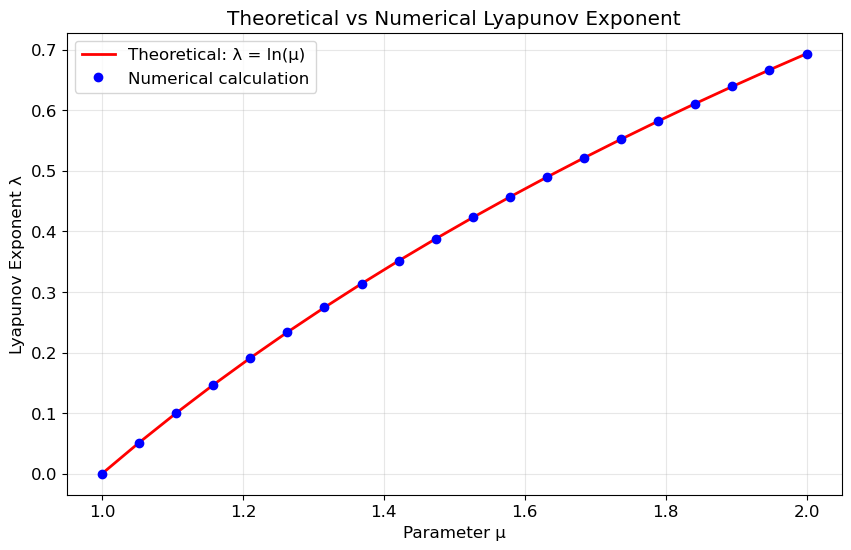

The tent map provides an exact analytical example where:
- Chaos occurs for μ > 1
- Lyapunov exponent λ = ln(μ) for μ ≥ 1
- The system is exactly solvable despite being chaotic


In [118]:
# Theoretical vs numerical Lyapunov exponent comparison
mu_theory = np.linspace(1.0, 2.0, 20)
lambda_theory = np.log(mu_theory)
lambda_numerical = [lyapunov_exponent(mu) for mu in mu_theory]

plt.figure(figsize=(10, 6))
plt.plot(mu_theory, lambda_theory, 'r-', linewidth=2, label='Theoretical: λ = ln(μ)')
plt.plot(mu_theory, lambda_numerical, 'bo', markersize=6, label='Numerical calculation')
plt.xlabel('Parameter μ')
plt.ylabel('Lyapunov Exponent λ')
plt.title('Theoretical vs Numerical Lyapunov Exponent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("The tent map provides an exact analytical example where:")
print(f"- Chaos occurs for μ > 1")
print(f"- Lyapunov exponent λ = ln(μ) for μ ≥ 1")
print(f"- The system is exactly solvable despite being chaotic")